# PageRank

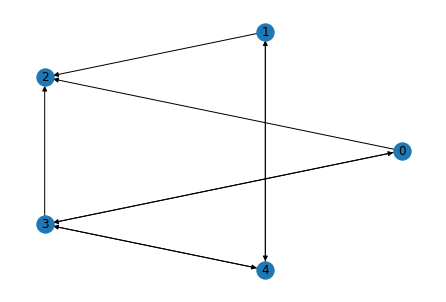

In [111]:
#import library
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#import array
myWeb=nx.DiGraph()
myPages=range(0,4)

#creating line connections
connections = [(0,3),(0,2),(3,0),(1,2),(1,4),(4,1),(4,3),(3,4),(3,2)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

#plotting
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [112]:
def createPageRank(aGraph):
    nodes_set=len(aGraph)
    M=nx.to_numpy_matrix(aGraph)
    outwards=np.squeeze(np.asarray(np.sum(M,axis=1)))
    prob_outwards = np.array(
        [1.0/count
        if count > 0 else 0.0 for count in outwards])
    G=np.asarray(np.multiply(M.T,prob_outwards))
    p=np.ones(nodes_set)/float(nodes_set)
    if np.min(np.sum(G,axis=0))<1.0:
        print('WARN : G is subtochastic')
        return G,p
    

In [113]:
G,p = createPageRank(myWeb)
print(G)

WARN : G is subtochastic
[[0.         0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.5       ]
 [0.5        0.5        0.         0.33333333 0.        ]
 [0.5        0.         0.         0.         0.5       ]
 [0.         0.5        0.         0.33333333 0.        ]]
